# Tugas 4 Backpropagation
## Alvin Farkhan R (16/394074/PA/17165)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from random import seed
from random import random

In [2]:
df = pd.read_csv('iris.csv')
columnName = ['sepal_length','sepal_width','petal_length','petal_width','species']
df.columns = columnName

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['category'] = ''
df.loc[df.species == 'setosa', ['category']] = 0.0
df.loc[df.species == 'versicolor', ['category']] = 1.0
df.loc[df.species == 'virginica', ['category']] = 2.0

df

,sepal_length,sepal_width,petal_length,petal_width,species,category
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


## Visualization

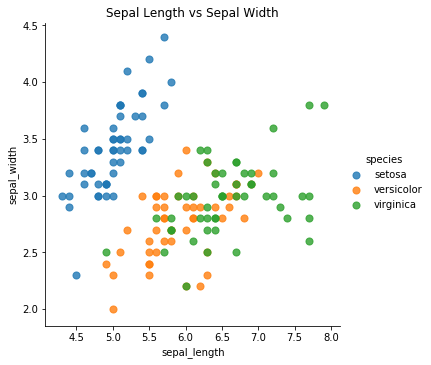

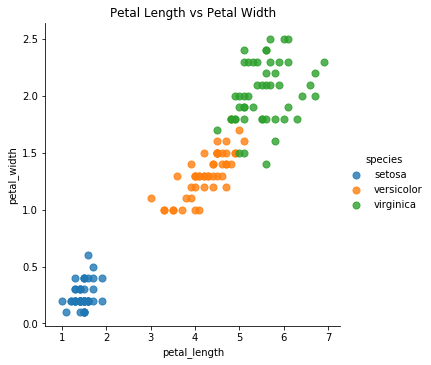

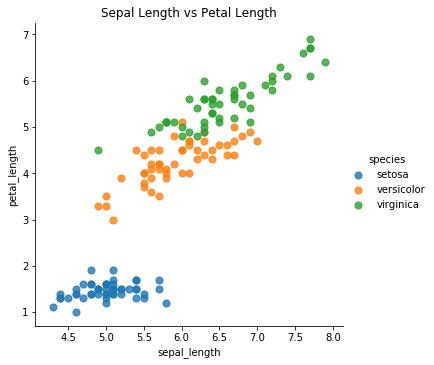

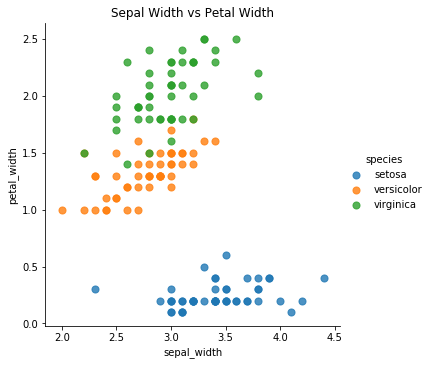

In [4]:
sns.lmplot('sepal_length', 'sepal_width',
           data = df,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('Sepal Length vs Sepal Width')

sns.lmplot('petal_length', 'petal_width',
           data = df,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('Petal Length vs Petal Width')

sns.lmplot('sepal_length', 'petal_length',
           data = df,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('Sepal Length vs Petal Length')

sns.lmplot('sepal_width', 'petal_width',
           data = df,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('Sepal Width vs Petal Width')
plt.show()

## Function

In [6]:
def calcresult(weight, theta):
    result = weight[-1]
    for i in range(len(weight)-1):
        result += weight[i] * theta[i]
    return result

def activation(x):
    return 1/(1+np.exp(-x))

def delta(output):
    return output * (1.0 - output)

def er(actual, predicted):
    error = 1/2*(predicted - actual)**2
    return error

def pred(activation):    
    if activation >= 0.5:
        prediction = 1.0
    else: 
        prediction = 0.0
    return prediction  
    
def inisialisasi(nInput, nHidden, nOut):
    net = list()
    hiddenlayer = [{'w':[random() for i in range(nInput + 1)]} for i in range(nHidden)]
    outputlayer = [{'w':[random() for i in range(nHidden + 1)]} for i in range(nOut)]
    net.append(hiddenlayer)
    net.append(outputlayer)
    return net

def feedforward(net, row):
    inputs = row
    for layer in net:
        nextinput = []
        for n in layer:
            result = calcresult(n['w'], inputs)
            n['out'] = activation(result)
            nextinput.append(n['out'])
        inputs = nextinput
    return inputs

def backprop(network, target):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                e = 0.0
                for n in network[i + 1]:
                    e += (n['w'][j] * n['delta'])
                errors.append(e)
        else:
            for j in range(len(layer)):
                n = layer[j]
                errors.append(target[j] - n['out'])
        for j in range(len(layer)):
            n = layer[j]
            n['delta'] = errors[j] * delta(n['out'])

def updateweight(network, row, lr):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['out'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['w'][j] += lr * neuron['delta'] * inputs[j]
            neuron['w'][-1] += lr * neuron['delta']

def accuracymetric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))

In [7]:
def trainnetwork(network, train, lr, epoch, n_out):
    for ep in range(epoch):
        bener = 0
        sumerror = 0 
        exp=[]
        pred=[]
        for row in train:
            outputs = feedforward(network, row)
            expected = [0 for i in range(n_out)]
            expected[int(row[-1])] = 1
            sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
            backprop(network, expected)
            updateweight(network, row, lr)

            for i in range(len(expected)):
                if outputs[i] >=0.5: 
                    outputs[i]=1
                else: outputs[i]=0

            if (expected == outputs) :
                bener +=1
       
        errr.append(sumerror/len(train))
    
        acc.append(bener/len(train))
    
def valnetwork(network, val, lr, epoch, n_out):
    for ep in range(epoch):
        bener = 0
        sumerror = 0 
        exp=[]
        pred=[]
        for row in train:
            outputs = feedforward(network, row)
            expected = [0 for i in range(n_out)]
            expected[int(row[-1])] = 1
            sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
            backprop(network, expected)

            for i in range(len(expected)):
                if outputs[i] >=0.5: 
                    outputs[i]=1
                else: outputs[i]=0

            if (expected == outputs) :
                bener +=1

        errval.append(sumerror/len(train))

        accval.append(bener/len(train))
    print(errval)

    print(accval)

## Training and Validation

In [5]:
dfmatrix = df[['sepal_length','sepal_width','petal_length','petal_width','category']].as_matrix()
seed(10)
data = dfmatrix.tolist()
np.random.shuffle(data)

data[0:10]

C:\Users\Alvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


[[5.7, 2.6, 3.5, 1.0, 1.0],
 [4.8, 3.4, 1.6, 0.2, 0.0],
 [5.4, 3.7, 1.5, 0.2, 0.0],
 [7.7, 2.8, 6.7, 2.0, 2.0],
 [5.0, 3.0, 1.6, 0.2, 0.0],
 [5.0, 2.3, 3.3, 1.0, 1.0],
 [6.0, 2.9, 4.5, 1.5, 1.0],
 [5.9, 3.2, 4.8, 1.8, 1.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [5.7, 2.9, 4.2, 1.3, 1.0]]

In [28]:
total=len(data)
lentrain=int(0.75*total)
lenval=int(0.25*total)

train = data[:lentrain]
val = data[lentrain:]

#### Learning Rate 0.1

In [29]:
errr=[]
acc=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, 0.5, 300, n_outputs)
for layer in network:
    print(layer)

[{'w': [-3.1591211748173973, -4.761314521601564, 5.288912412073028, 7.802379195635154, -4.075635462729584], 'out': 9.581022018159266e-13, 'delta': -1.3054554927786033e-15}, {'w': [-0.8678750840183022, -1.7932461484568418, 3.5366947327674527, 1.3823273804522773, -0.3620231234302523], 'out': 0.003798031422404267, 'delta': -8.46345051266463e-05}]
[{'w': [-4.562041336004902, -6.271632784772302, 3.124727107988708], 'out': 0.956922833462239, 'delta': 0.001775706465524513}, {'w': [-5.588970405478719, 6.193198112848163, -3.119843281443259], 'out': 0.04326666548837667, 'delta': -0.0017910089568040804}, {'w': [6.115726693587635, 0.26186626067298424, -3.732195022530306], 'out': 0.023404437864336713, 'delta': -0.0005349475163719582}]


In [32]:
errval=[]
accval=[]
seed(8080)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

valnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
    print(layer)

[0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.02632333314367858, 0.0263233331

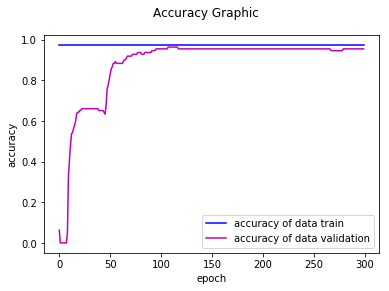

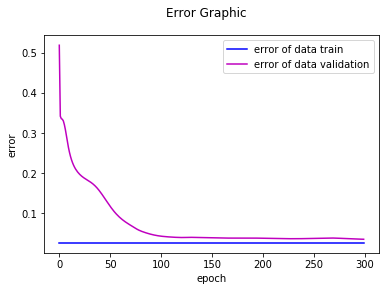

In [34]:
    x=plt.figure()
    plt.suptitle('Accuracy Graphic')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(accval,'-b')
    plt.plot(acc,'-m')
    plt.gca().legend(('accuracy of data train','accuracy of data validation'))
    y=plt.figure()

    y.suptitle('Error Graphic')
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.plot(errval,'-b')
    plt.plot(errr,'-m')  
    plt.gca().legend(('error of data train','error of data validation'))

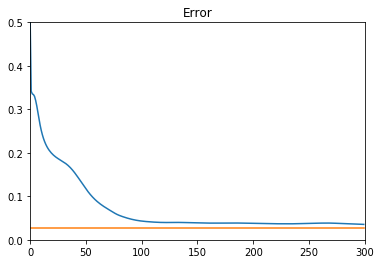

In [36]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,0.5), autoscale_on=False,
           title='Error')
axzoom.plot(errr)
axzoom.plot(errval)

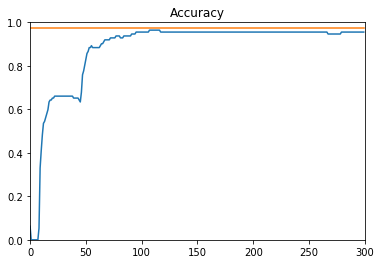

In [37]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,1), autoscale_on=False,
           title='Accuracy')
axzoom.plot(acc)
axzoom.plot(accval)

In [48]:
max = 0
for i in range(len(acc)):
    if max < acc[i]:
        max = acc[i]
print(max, i)

0.9642857142857143 299


In [49]:
max = 0
for i in range(len(errr)):
    if max < errr[i]:
        max = errr[i]
print(max, i)

0.5183045665413163 299
